In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv('/content/Dataset_de_Clasificaci_n_Binaria.csv')
data.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.429244,-2.211862,0.189756,0.588553,0.820374,-0.180392,-1.150654,1.471709,0.701585,-0.833474,...,0.702818,-0.225999,1.533434,1.372848,0.673782,0.742188,0.944224,-0.266652,1.401753,0
1,1.912005,-0.058430,0.945732,1.164060,0.865133,-0.578460,0.586838,0.028479,0.002798,0.181468,...,0.743411,-0.588038,0.826403,-0.077494,-0.077959,-0.836749,-0.542045,-0.051542,0.514670,1
2,0.707458,0.785185,1.475818,0.776932,1.339682,-0.005107,0.936079,0.020959,-0.006862,0.297115,...,1.151227,-0.915905,-1.777681,0.398764,-0.132699,-1.320326,-0.862729,-0.233724,0.782346,1
3,0.732829,-0.423760,-0.485576,-1.274232,0.178343,0.808036,-1.522142,1.396400,0.673300,-0.930437,...,0.151199,0.197960,-0.453414,-0.848066,0.703599,1.305570,1.291803,-0.330090,0.985544,0
4,1.252541,-0.412479,0.107471,-0.779019,0.751662,-0.817682,-1.214579,1.484102,0.708453,-0.858086,...,0.643753,-0.175931,-0.738697,-1.133830,0.687558,0.824222,1.002066,2.022590,1.370145,0


In [ ]:

# Dividir el dataset en conjunto de entrenamiento y prueba
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       157
           1       0.86      0.89      0.88       143

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Confusion Matrix:
[[137  20]
 [ 16 127]]


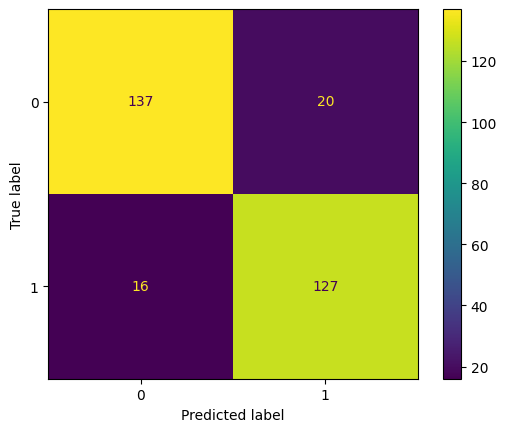

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=clf.classes_)
disp.plot()

# Tarea

 1. Cambiar la proporción de entrenamiento y prueba.

 Entrenar un modelo básico y entender como afecta las proporciones de partición las métricas principales de los modelos.

 Recordar siempre que la proporción más grande se debe usar para entrenar y la parte más pequeña para testear.
 2. Con la proporción con mejores métricas, cambiar los hiperparametros del algoritmo, evaluar el modelo y comparar las métricas. Definir cual es el mejor modelo.

 Revisar hiperparametros en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

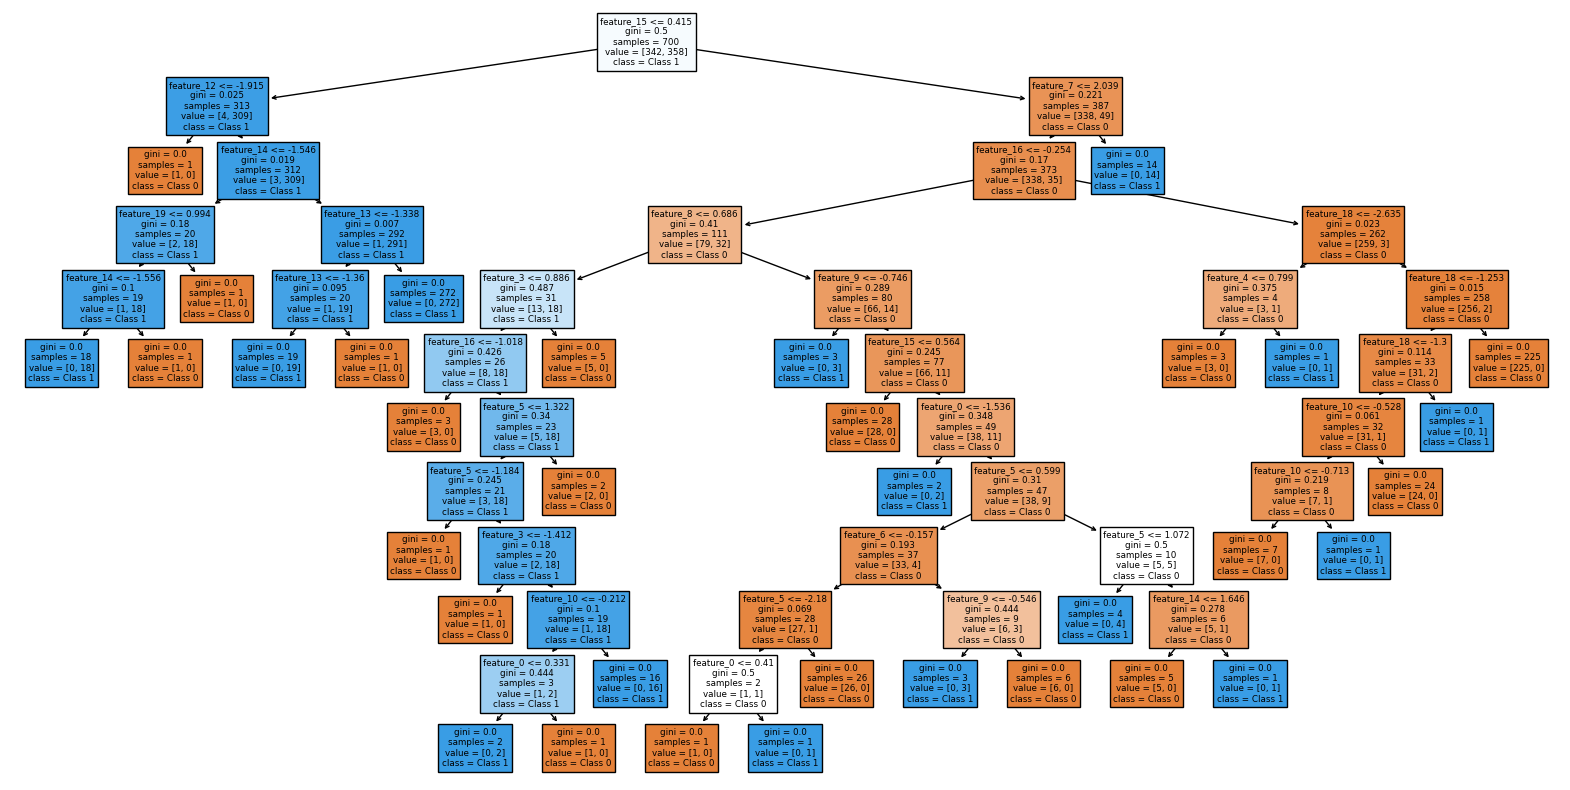

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
clf.feature_importances_

array([0.01383971, 0.        , 0.        , 0.01636602, 0.00428795,
       0.03117643, 0.00344913, 0.06334766, 0.02101891, 0.02356333,
       0.00714346, 0.        , 0.00558994, 0.00569769, 0.01117887,
       0.73788141, 0.04345592, 0.        , 0.00712886, 0.00487473])

Text(0, 0.5, 'Importancia relativa')

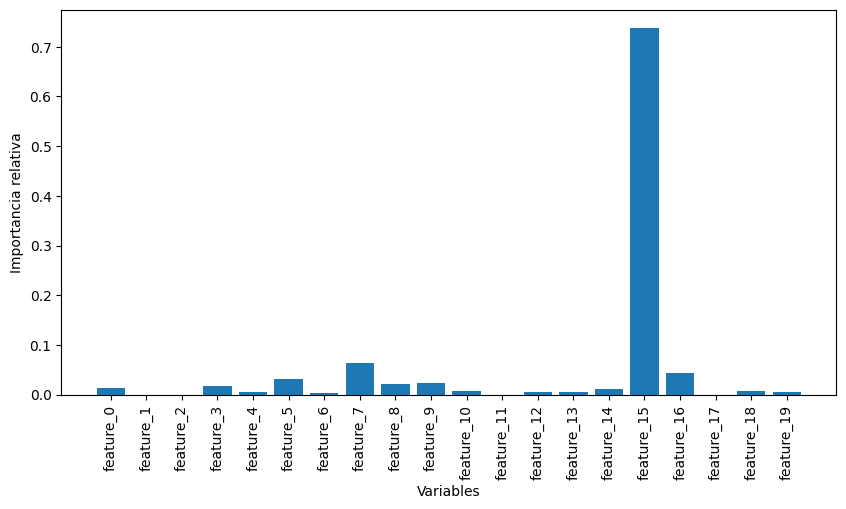

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x= clf.feature_names_in_ ,height = clf.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia relativa')